# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)


<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: 1. In which city do people hire more cycles.
         '''2. Which month do people hire more cycle.

> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [105]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.
from datetime import datetime #parse and format the date and time

In [106]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f_in)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = next(trip_reader)
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip)
    
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [107]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    
    if city == 'Washington':
        duration = round(((int((datum['Duration (ms)'])) / 1000) / 60),4)
    elif city in('Chicago','NYC'):
        duration = round(((int(datum['tripduration'])) / 60),4)
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001,"The value returned by duration_in_mins() is wrong. Contact the developer"


In [108]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    # YOUR CODE HERE
    
    if city in('Chicago', 'NYC'):
        timestamp = datum['starttime']
    elif city == 'Washington':
        timestamp = datum['Start date']
    
    if city in('Chicago','Washington'):
        date_obj = datetime.strptime(timestamp, '%m/%d/%Y %H:%M')
    elif city == 'NYC':
        date_obj = datetime.strptime(timestamp, '%m/%d/%Y %H:%M:%S')
    
    month, hour, day_of_week = int(datetime.strftime(date_obj,'%m')),int(datetime.strftime(date_obj,'%H')),datetime.strftime(date_obj, '%A')
        
    return (month, hour, day_of_week)

# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city], 'The result is not correct. Please contact the developer'


In [109]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    if city in('NYC','Chicago'):
        user_type = datum['usertype']
    else:
        user = datum['Member Type']
        if user == 'Registered':
            user_type = 'Subscriber'
        else:
            user_type = 'Customer'
    
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city], "The output is wrong. Please contact your developer."

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [110]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            new_point['duration'] = duration_in_mins(row, city)
            new_point['month'],new_point['hour'],new_point['day_of_week'] = time_of_trip(row, city)
            new_point['user_type'] = type_of_user(row, city)
         
            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            
            trip_writer.writerow(new_point)
            
            
            

In [111]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.1231'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.4333'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.9833'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: NYC has the highest number of trips. Total no of trips in NYC is **276798**.<Br>NYC has the highest proportion of trips made by subscibers with **88.84%** of its trips made by subscribers in NYC.<Br>Chicago has the highest proportion of trips made by short-term customers with **23.77%** of its trips made by short-term customers in Chicago.

In [112]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total)

In [113]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##

data_files = ['./data/Chicago-2016-Summary.csv',
              './data/NYC-2016-Summary.csv',
              './data/Washington-2016-Summary.csv']
for file in data_files:
    print('For the City: '+file.split('/')[-1].split('-')[0])
    subs,custs,total = number_of_trips(file)
    print('No of subscribers: {}\nNo of Customers: {}\nTotal no of trips: {}'.format(subs,custs,total)+
    'Proportion of trips made by subscribers: '+str(round(((subs/total)*100),2))+'%\n'+
    'Proportion of trips made by customers: '+str(round(((custs/total)*100),2))+'%\n')

For the City: Chicago
No of subscribers: 54982
No of Customers: 17149
Total no of trips: 72131Proportion of trips made by subscribers: 76.23%
Proportion of trips made by customers: 23.77%

For the City: NYC
No of subscribers: 245896
No of Customers: 30902
Total no of trips: 276798Proportion of trips made by subscribers: 88.84%
Proportion of trips made by customers: 11.16%

For the City: Washington
No of subscribers: 51753
No of Customers: 14573
Total no of trips: 66326Proportion of trips made by subscribers: 78.03%
Proportion of trips made by customers: 21.97%



> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: For the City: **Chicago**
The average trip length is 16 and 8.3% of trips are longer than 30 minutes<BR>
For the City: **NYC**
The average trip length is 15 and 7.3% of trips are longer than 30 minutes<BR>
For the City: **Washington**
The average trip length is 18 and 10.8% of trips are longer than 30 minutes

In [114]:
def get_mean_and_proportion(dictn, col_name, data_point = 500):
    '''
    This function will take a dictionary, a column name and a data point as input and calculate the average value of the 
    values from column col_name and the proportion of values greater than the data_point in the col_name
    '''
    col_value_sum = 0.0
    data_point_sum = 0.0
    data_length = 0
    data_point_count = 0
    
    #loop through each row in the dictionary
    for row in dictn:        
        #get the column value
        col_value = float(row[col_name])
        #derive the total number of rows
        data_length += 1
        #calculate the sum of values in the col_value
        col_value_sum += col_value
        
        #get the col_value that are greater than data_point
        if col_value > data_point:
            #get the numbers of trips longer than data_point minutes
            data_point_count += 1
        
    #calculate the proportion    
    proportion_calcd = round((data_point_count / data_length) * 100, 1)
    #Calculating the average of trip durations
    avg_col_values = col_value_sum//data_length
    return avg_col_values, proportion_calcd

In [115]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##
def trip_lengths(filename):
    '''
    This function reads trip data from a file and calculates the average trip length and
    derives the proportion of rides that are longer than 30 minutes
    '''
    #read data from the file
    with open(filename,'r') as f_read:
        data = csv.DictReader(f_read)
        data1 = csv.DictReader(f_read)
        
        #call the mean and proportion function to get the average value and the proportions
        avg_trip_duration,ride_prop = get_mean_and_proportion(data,'duration',30)
        
    #return the calculated values
    return avg_trip_duration,ride_prop

In [116]:
data_files = ['./examples/BayArea-Y3-Summary.csv'
             ,'./data/Chicago-2016-Summary.csv'
             ,'./data/NYC-2016-Summary.csv'
              ,'./data/Washington-2016-Summary.csv']
for file in data_files:
    print('For the City: '+file.split('/')[-1].split('-')[0])
    average,proportion = trip_lengths(file)
    print('The average trip length is {} and {}% of trips are longer than 30 minutes'.format(str(int(average)),str(proportion)))

For the City: BayArea
The average trip length is 14 and 3.5% of trips are longer than 30 minutes
For the City: Chicago
The average trip length is 16 and 8.3% of trips are longer than 30 minutes
For the City: NYC
The average trip length is 15 and 7.3% of trips are longer than 30 minutes
For the City: Washington
The average trip length is 18 and 10.8% of trips are longer than 30 minutes


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: In Washington city, the customers take longer rides on average than the subscribers Infact in all the cities the customers take longer rides than the subscribers

In [117]:
def get_average(file_name):
    '''
    This function calculates the average trip duration of customers and subscribers
    It gets the file name as a string input and returns tha average integer values as output
    '''
    subs_sum = 0.0
    cust_sum = 0.0
    subs_count = 0.0
    cust_count = 0.0
    avg_subs = 0.0
    avg_cust = 0.0
    
    #open the file for reading
    with open(file_name, 'r') as f_in:
     #read it as a dictionary
        reader = csv.DictReader(f_in)
        
        #reading through each rows in the dictionary
        for row in reader:
            #get the duration value
            col_value = float(row['duration'])
            
            #get the sum of trip durations for subscribers and customers separately and get their counts
            if row['user_type'] == 'Subscriber':
                subs_sum += col_value
                subs_count += 1
            elif row['user_type'] == 'Customer':
                cust_sum += col_value
                cust_count += 1
                
        #get the average
        avg_subs = round(subs_sum / subs_count,1)
        avg_cust = round(cust_sum / cust_count,1)
            
        return avg_subs,avg_cust
        
        
        

In [118]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##
file_data = ['./examples/BayArea-Y3-Summary.csv',
             './data/Chicago-2016-Summary.csv',
             './data/NYC-2016-Summary.csv',
              './data/Washington-2016-Summary.csv']

for file_name in file_data:
    city = file_name.split('/')[-1].split('-')[0]
    subs_avg,cust_avg = get_average(file_name)
    print('In {}, the average trip duration of subscribers is {} and the average trip duration of customers is {}.'.format(city,subs_avg,cust_avg))
    


In BayArea, the average trip duration of subscribers is 9.5 and the average trip duration of customers is 54.6.
In Chicago, the average trip duration of subscribers is 12.1 and the average trip duration of customers is 31.0.
In NYC, the average trip duration of subscribers is 13.7 and the average trip duration of customers is 33.0.
In Washington, the average trip duration of subscribers is 12.5 and the average trip duration of customers is 41.7.


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

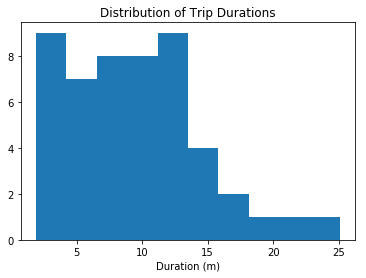

In [119]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

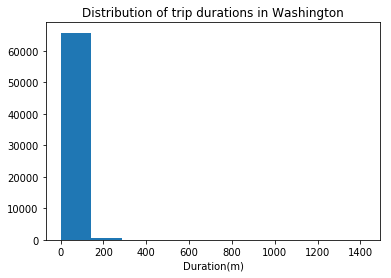

In [120]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##
filename = './data/Washington-2016-Summary.csv'
trip_time_list = []
with open(filename, 'r') as f_in:
    reader = csv.DictReader(f_in)
        
    for row in reader:
        trip_time_list.append(round(float(row['duration']),2))
plt.hist(trip_time_list)
plt.xlabel('Duration(m)')
plt.title('Distribution of trip durations in Washington')
plt.show()


If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: In the city of Washington, the Customers' Trip duration distribution has a peak at 15 to 20 minutes and the subscribers' trip duration distribution has a peak at 5 to 10 minutes. Both the shapes are right skewed distribution. The mean will be greater than the media in each case because of the skewness in this case.

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


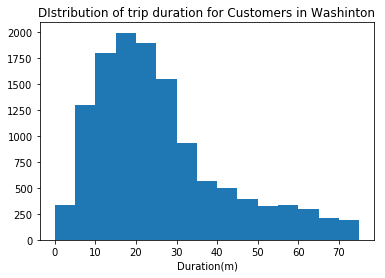

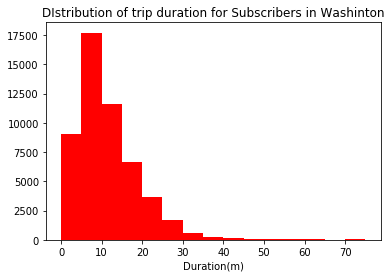

In [121]:
## Use this and additional cells to answer Question 5. ##

filename = './data/Washington-2016-Summary.csv'
cust_trip_time_list = []
subs_trip_time_list = []
with open(filename, 'r') as f_in:
    reader = csv.DictReader(f_in)
        
    for row in reader:
        if row['user_type'] == 'Customer':
            cust_trip_time_list.append(round(float(row['duration']),2))
        elif row['user_type'] == 'Subscriber':
            subs_trip_time_list.append(round(float(row['duration']),2))
        
f = plt.figure(1)
plt.hist(cust_trip_time_list,range = (0,75), bins = 15)
plt.xlabel('Duration(m)')
plt.title('DIstribution of trip duration for Customers in Washinton')

f.show()
g = plt.figure(2)
plt.hist(subs_trip_time_list,range = (0,75), bins = 15,color = 'red')
plt.xlabel('Duration(m)')
plt.title('DIstribution of trip duration for Subscribers in Washinton')

g.show()


<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: 1.How does the ridership differ by month?-> Answer: The ridership is maximun in July(7341 customers) followed by June(7320 customers). The month with the lowest ridership is Jan(2434 customers). The months between June to Oct can be considered as the period in which Washingtons gets its peak ridership.<Br>
            2.Which month has the highest ridership? -> Answer: The highest ridership is in the month of July with 7341 customers.<Br>
            3.Does the ratio of Customers trips change depending on the month? -> Answer: The ratio does change. However the Subscriber ridership is always greater than the Customer ridership for all the months<Br>
            
            
            
common_monthly_ridership : <Br>
2434, 2854, 5571, 5602, 5768, 7320, 7341, 7198, 6878, 6792, 5214, 3354<Br>
cust_monthly_ridership: <Br>
222, 283, 1188, 1192, 1248, 1707, 2186, 1806, 1674, 1560, 1075, 432<Br>
subs_monthly_ridership: <Br>
2212, 2571, 4383, 4410, 4520, 5613, 5155, 5392, 5204, 5232, 4139, 2922

# Function Definitions

In [122]:
def get_monthly_ridership(filename):
    '''This function calculates the monthly ridership.
    It takes the filename as a string input and returns three list that contains monthly ridership for each month
    '''
    common_mnth_ridership = [0] * 12
    cust_mnth_ridership = [0] * 12
    subs_mnth_ridership = [0] * 12
    
    #opens the file and reads the rows in the form of dictionary
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        
        #calculates ridership for each row
        for row in reader:
            common_mnth_ridership[int(row['month']) - 1] += 1
            if row['user_type'] == 'Customer':
                cust_mnth_ridership[int(row['month']) - 1] += 1
            elif row['user_type'] == 'Subscriber':
                subs_mnth_ridership[int(row['month']) - 1] += 1
    #returning the values
    return common_mnth_ridership,cust_mnth_ridership,subs_mnth_ridership

In [123]:
def single_graph(x_axis,y,title,x_axis_names,color = 'brown'):
    '''
    This function creates a single graph.
    It gets x_axis - a list of integers
    y - > list of integers
    title -> string
    x_axis_names - list of strings for ploting the xticks
    color -> name of the color.: default = brown
    '''
    
    #creating a figure
    fig1 = plt.figure(figsize=(10,4))
    #ploting the graph
    plt.bar(x_axis,y,color = color)
    plt.xticks(x_axis,x_axis_names)
    plt.ylabel('No. of trips')
    plt.xlabel('Months')
    #displaying the values of each bar on the top of the bars
    for x,y in zip(range(len(x_axis)),y):
        plt.text(x+0.7,y,y)
    plt.title(title)
    fig1.show()


In [124]:
def double_graph(x_axis,y1,y1_title,y2,y2_title,x_ticks,y2_color = 'red',y1_color = 'blue'):
    '''
    This function plots two graphs side-by-side
    inputs: 
    It gets x_axis - a list of integers
    y1 and y2 - > lists of integers
    y1_title and y2_title -> strings for title of graph
    x_axis_names - list of strings for ploting the xticks
    y1_color and y2_color -> name of the color.: y1_color default = blue
                                                 y2_color default = red
    '''
    
    #creating a figure
    fig = plt.figure(figsize=(13,4))
    #ploting the 1st subplot in 1st row 1st column
    plt.subplot(121)
    plt.bar(x_axis,y1,color = y1_color)
    plt.xticks(x_axis,x_ticks)
    plt.ylabel('No. of trips')
    plt.xlabel('Months')
    #displaying the values on top of each bars
    for x,y in zip(range(len(x_ticks)),y1):
        plt.text(x+0.6,y,y)
    plt.title(y1_title)

    #ploting the 2nd subplot in 1st row 2nd column 
    plt.subplot(122)
    plt.bar(x_axis,y2,color = y2_color)
    plt.xticks(x_axis,x_ticks)
    plt.ylabel('No. of trips')
    plt.xlabel('Months')
    plt.title(y2_title)
    #displaying the values on top of each bars
    for x,y in zip(range(len(x_ticks)),y2):
        plt.text(x+0.6,y,y)
    plt.tight_layout()
    fig.show()


In [125]:
def get_monthly_proportion(common,cust,subs):
    '''
    This function gets the proportion of custs and subs with respect to common for each values in common
    input:
    common,cust,subs -> list of integers
    '''
    cust_prop = []
    subs_prop = []
    for item in range(len(common)):
        cust_prop.append(round((cust[item]/common[item]),2))
        subs_prop.append(round((subs[item]/common[item]),2))
    return cust_prop,subs_prop

# Statistics

In [126]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above.                                       ##
filename = './data/Washington-2016-Summary.csv'
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x_months = list(range(1,len(months) + 1))
#get the monthly ridership details
common_monthly_ridership,cust_monthly_ridership,subs_monthly_ridership = get_monthly_ridership(filename)

#get the monthly proportion
cust_monthly_proportion,subs_monthly_proportion = get_monthly_proportion(common_monthly_ridership,cust_monthly_ridership,subs_monthly_ridership)
print("The Customers' proportion each month is: {} \nThe Subscribers' proportion each month is: {} ".format(cust_monthly_proportion,subs_monthly_proportion))


The Customers' proportion each month is: [0.09, 0.1, 0.21, 0.21, 0.22, 0.23, 0.3, 0.25, 0.24, 0.23, 0.21, 0.13] 
The Subscribers' proportion each month is: [0.91, 0.9, 0.79, 0.79, 0.78, 0.77, 0.7, 0.75, 0.76, 0.77, 0.79, 0.87] 


# Data Visualization

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


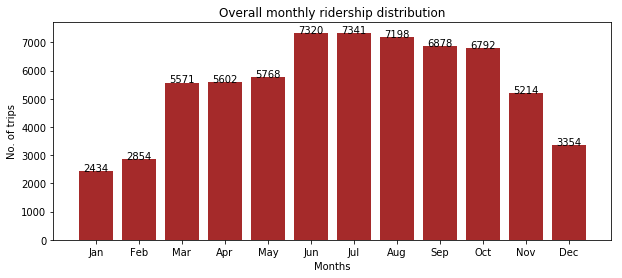

In [127]:
#Data Visualization
single_graph(x_months,common_monthly_ridership,"Overall monthly ridership distribution",months)

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


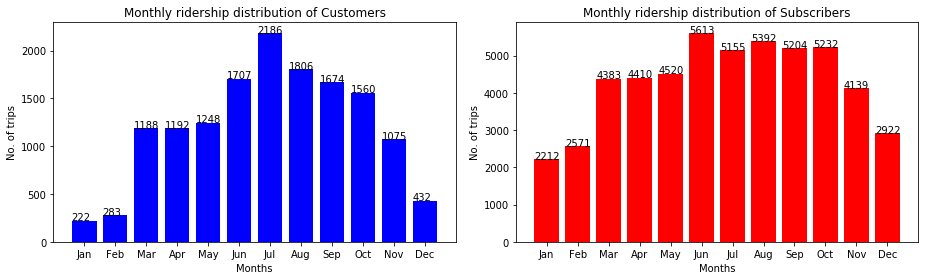

In [128]:
double_graph(x_months,cust_monthly_ridership,"Monthly ridership distribution of Customers",subs_monthly_ridership,"Monthly ridership distribution of Subscribers",months)

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: I would like to apply the data science technique in the field of healthcare where we can build a model which can prdictict if a person has higher chance or not for being affected by any particular decease in future based on some test reports or metrics. This can help detect any deadly deceases in its early phases.

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

> If you are working on this project via the Project Notebook page in the classroom, you can also submit this project directly from the workspace. **Before you do that**, you should save an HTML copy of the completed project to the workspace by running the code cell below. If it worked correctly, the output code should be a 0, and if you click on the jupyter icon in the upper left, you should see your .html document in the workspace directory. Alternatively, you can download the .html copy of your report following the steps in the previous paragraph, then _upload_ the report to the directory (by clicking the jupyter icon).

> Either way, once you've gotten the .html report in your workspace, you can complete your submission by clicking on the "Submit Project" button to the lower-right hand side of the workspace.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])